<a href="https://colab.research.google.com/github/duynguyen02/tls_ml_loan_prediction_1/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lợi nhuận của ngân hàng được tạo ra phần lớn thông qua các khoản vay. Mặc dù có rất nhiều người đăng ký cho các khoản vay, nhưng khó để chọn người có khả năng chi trả các khoản đã vay. Với việc thực hiện xác định bằng thủ công sẽ gặp rất nhiều vấn đề bất cập và sai sót xảy ra. Vì vậy việc ứng dụng Machine Learning trong việc dự đoán khả năng chi trả các khoản vay là một việc làm cần thiết để phân tích thông kê và đưa ra các quyết định để xác nhận các khoản cho phép vay phù hợp.

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Trình diễn tập dữ liệu

In [240]:
# độc tập dữ liệu và xuất 1 vài kết quả đầu tiên
loan_app_df = pd.read_csv('/content/drive/MyDrive/train_csv.csv')
loan_app_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [241]:
# xuất số lượng dữ liệu
loan_app_df.shape

(614, 13)

In [242]:
# xuất thông tin các tên cột
loan_app_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [243]:
# xuất thông tin kiểu dữ liệu và số lượng dữ liệu của từng cột
loan_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [244]:
# xuất thông tin mô tả về trung bình, độ lệch chuẩn,... của tập dữ liệu
loan_app_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Tiền xử lý dữ liệu

Ta nhận thấy tập dữ liệu có số lượng bản ghi khá thấp vì vậy ta sẽ lắp vào dữ liệu bị thiếu bằng các dữ liệu tương tự chứ không thể nào xóa đi bởi sẽ làm giảm hiệu quả của việc phân tích.

In [245]:
# đếm các số lượng các dữ liệu bị thiếu theo từng cột
loan_app_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [246]:
# nhận thấy ở vài cột có kiểu dữ liệu số có giá trị giống nhau khá lớn 
# nên ta kiểm tra xem điều đó có chính xác hay không

loan_app_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [247]:
loan_app_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Ta nhận thấy ở Loan_Amount_Term và Credit_History số lượng các kết quả khác nhau quá thấp vì vậy ta chọn kết quả xuất hiện nhiều nhất lắp vào chỗ còn thiếu tương tự các cột thể hiện kiểu dữ liệu object

In [248]:
# lắp giá trị xuất hiện nhiều nhất vào các giá trị null
loan_app_df['Gender'].fillna(loan_app_df['Gender'].dropna().mode().values[0], inplace=True)
loan_app_df['Married'].fillna(loan_app_df['Married'].dropna().mode().values[0], inplace=True)
loan_app_df['Dependents'].fillna(loan_app_df['Dependents'].dropna().mode().values[0], inplace=True)
loan_app_df['Self_Employed'].fillna(loan_app_df['Self_Employed'].dropna().mode().values[0], inplace=True)

loan_app_df['Loan_Amount_Term'].fillna(loan_app_df['Loan_Amount_Term'].dropna().mode().values[0], inplace=True)
loan_app_df['Credit_History'].fillna(loan_app_df['Credit_History'].dropna().mode().values[0], inplace=True)


# lắp giá trị trung bình của toàn tập dữ liệu
loan_app_df['LoanAmount'].fillna(loan_app_df['LoanAmount'].dropna().mean(), inplace=True)

In [249]:
# kiểm tra lại xem dữ liệu còn thiếu hay không
loan_app_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Visualization

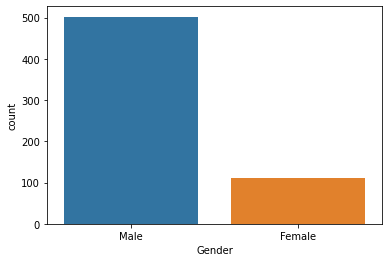

In [250]:
# biểu đồ thể hiện số người đăng ký khoản vay theo giới tính
sns.countplot(x='Gender', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay phần lớn giới tính là Male

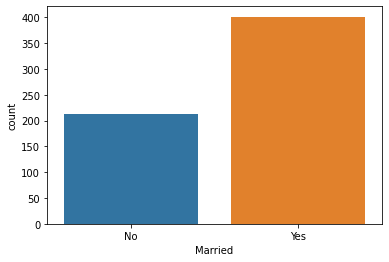

In [251]:
# biểu đồ thể hiện số người đăng ký khoản vay theo tình trạng hôn nhân
sns.countplot(x='Married', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay phần lớn đã kết hôn

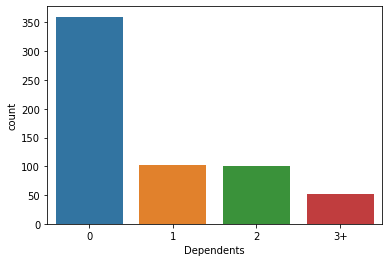

In [252]:
# biểu đồ thể hiện số người đăng ký khoản vay theo số người phụ thuộc
sns.countplot(x='Dependents', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay phần lớn là không có ai phụ thuộc còn lại các phần nằm ở 1, 2 và 3+

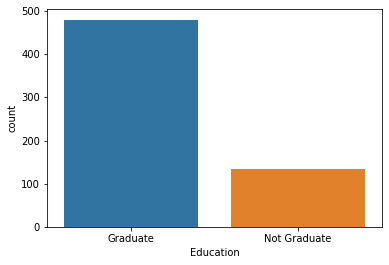

In [253]:
# biểu đồ thể hiện số người đăng ký khoản vay theo trình độ học vấn
sns.countplot(x='Education', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay phần lớn là đã tốt nghiệp

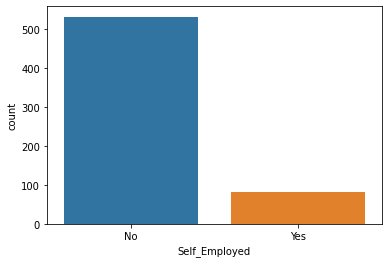

In [254]:
# biểu đồ thể hiện số người đăng ký khoản vay theo tự kinh doanh
sns.countplot(x='Self_Employed', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay phần lớn là không phải người tự kinh doanh

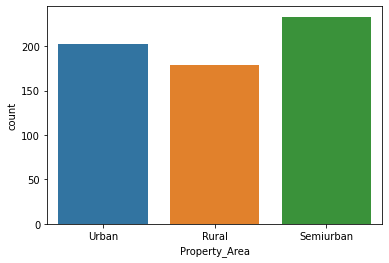

In [255]:
# biểu đồ thể hiện số người đăng ký khoản vay theo khu vực
sns.countplot(x='Property_Area', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay theo khu vực không có sự chênh lệch khá lớn, phân bổ đều theo từng vùng

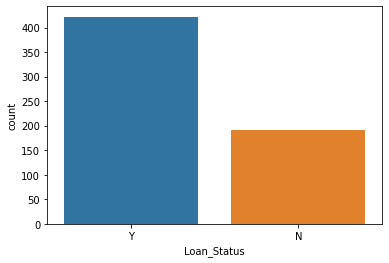

In [256]:
# biểu đồ thể hiện số người đăng ký khoản vay được chấp thuận vay
sns.countplot(x='Loan_Status', data=loan_app_df)

Ta nhận thấy số lượng người đăng ký khoản vay được chấp thuận theo tập dữ liệu nhiều hơn so với số người không được chấp thuận

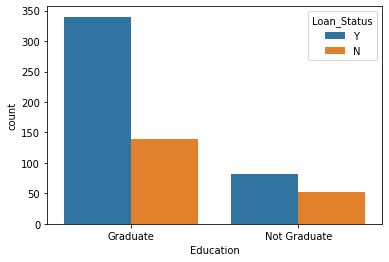

In [257]:
# biểu đồ thể hiện số người đăng ký khoản vay được chấp thuận vay theo trình độ học vấn
sns.countplot(x='Education', hue='Loan_Status', data=loan_app_df)

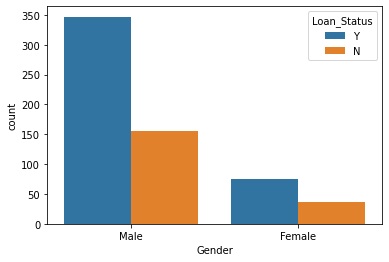

In [258]:
# biểu đồ thể hiện số người đăng ký khoản vay được chấp thuận vay theo giới tính
sns.countplot(x='Gender', hue='Loan_Status', data=loan_app_df)

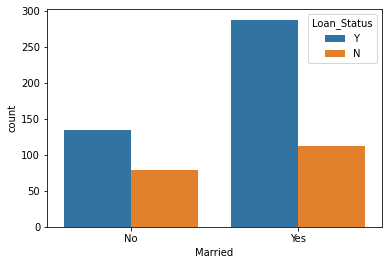

In [259]:
# biểu đồ thể hiện số người đăng ký khoản vay được chấp thuận vay theo trình trạng hôn nhân
sns.countplot(x='Married', hue='Loan_Status', data=loan_app_df)

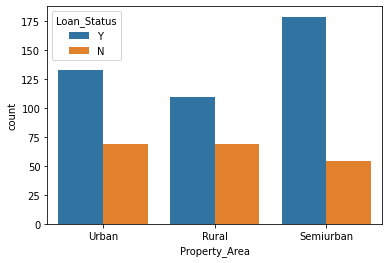

In [260]:
# biểu đồ thể hiện số người đăng ký khoản vay được chấp thuận vay theo khu vực
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_app_df)

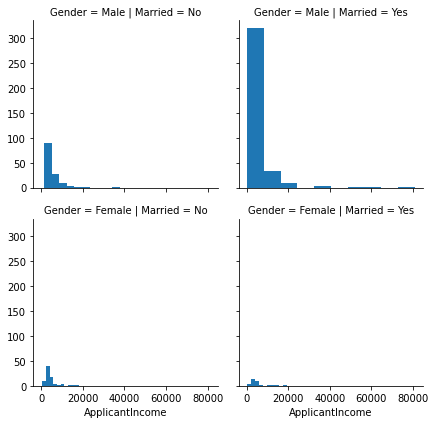

In [261]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, tình trạng hôn nhân và giới tính
grid = sns.FacetGrid(loan_app_df, row='Gender', col='Married')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 với giới tính nam và đã kết hôn

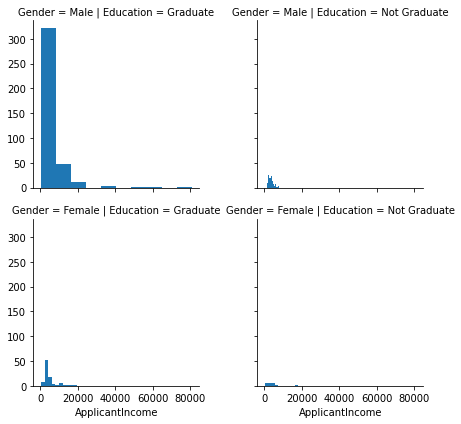

In [262]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, trình độ học vấn và giới tính
grid = sns.FacetGrid(loan_app_df, row='Gender', col='Education')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 có giới tính nam và đã tốt nghiệp

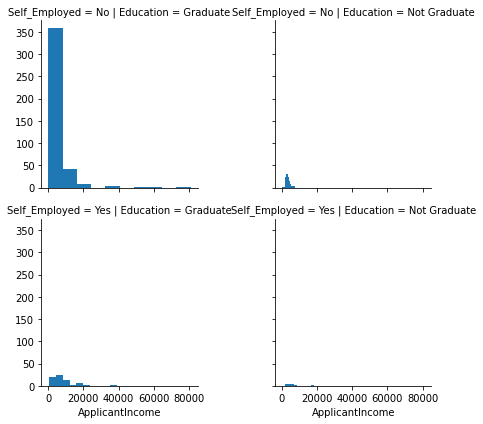

In [263]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, tự kinh doanh và trình độ học vấn
grid = sns.FacetGrid(loan_app_df, row='Self_Employed', col='Education')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 không tự kinh doanh và đã tốt nghiệp

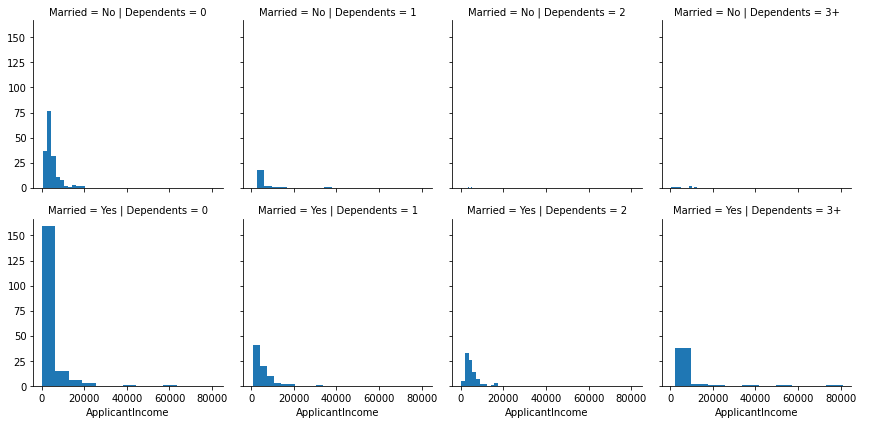

In [264]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, tình trạng hôn nhân và số người phụ thuộc
grid = sns.FacetGrid(loan_app_df, row='Married', col='Dependents')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 không có người phụ thuộc và đã kết hôn

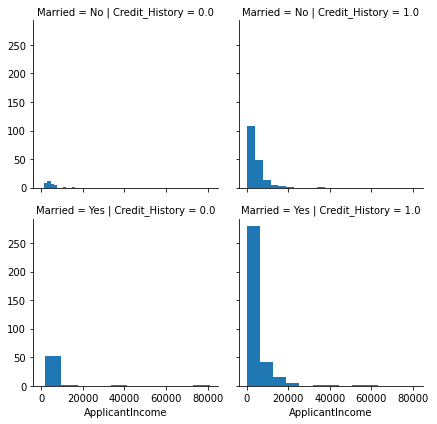

In [265]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, tình trạng hôn nhân và lịch sử tín dụng
grid = sns.FacetGrid(loan_app_df, row='Married', col='Credit_History')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 có lịch sử tính dụng là 1.0 và đã kết hôn

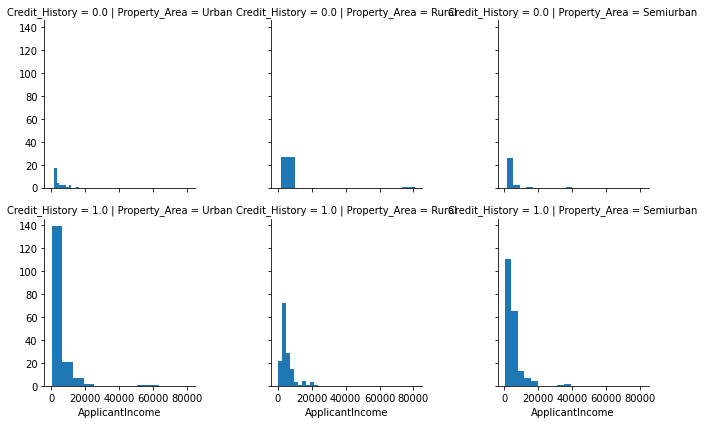

In [266]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, lịch sử tín dụng và khu vực
grid = sns.FacetGrid(loan_app_df, row='Credit_History', col='Property_Area')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 có lịch sử tính dụng là 1.0 và ở khu vực Urban và Semiurban

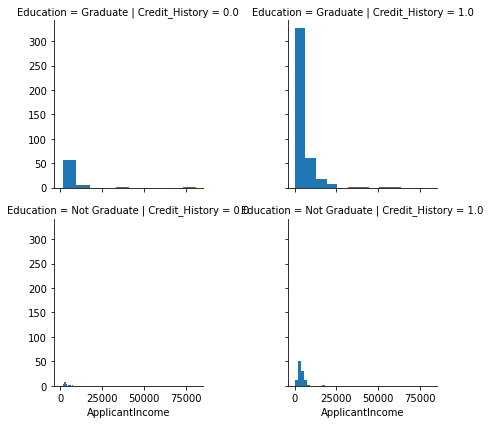

In [267]:
# biểu đồ thể hiện sự phân bổ số người đăng ký khoản vay thông qua thu nhập, lịch sử tín dụng và trình độ học vấn
grid = sns.FacetGrid(loan_app_df, row='Education', col='Credit_History')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

Ta nhận thấy số người đăng ký khoản vay phần lớn có khoản thu nhập nằm ở khoảng từ 0 đến 20000 có lịch sử tính dụng là 1.0 và đã tốt nghiệp

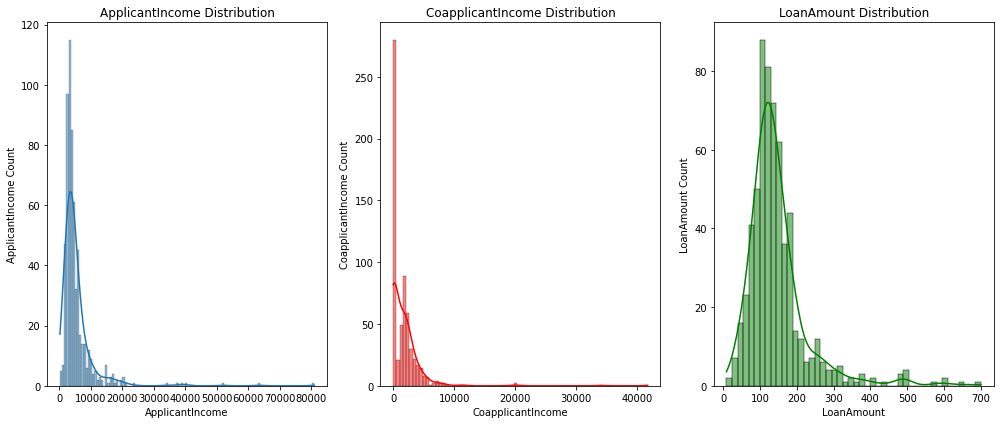

<Figure size 432x288 with 0 Axes>

In [268]:
# biểu đồ biểu thị sự phân bổ theo thu nhập, người đồng nộp đơn và số lượng vay
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.histplot(loan_app_df['ApplicantIncome'], ax = axes[0],kde=True).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncome Count')

sns.histplot(loan_app_df['CoapplicantIncome'], color = "r", ax = axes[1],kde=True).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.histplot(loan_app_df['LoanAmount'],color = "g", ax = axes[2],kde=True).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

### Normalization

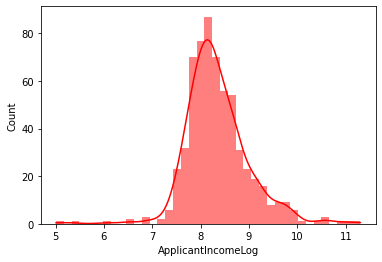

<Figure size 432x288 with 0 Axes>

In [269]:
# chuẩn hóa dữ liệu ApplicantIncome
loan_app_df['ApplicantIncomeLog'] = np.log(loan_app_df['ApplicantIncome'])
sns.histplot(loan_app_df['ApplicantIncomeLog'], color='red', kde=True, linewidth=0)
fig = plt.figure()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


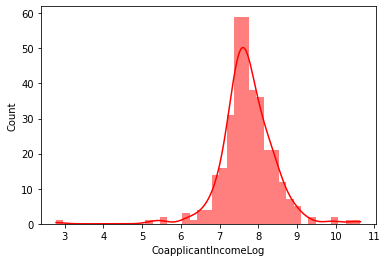

<Figure size 432x288 with 0 Axes>

In [270]:
# chuẩn hóa dữ liệu CoapplicantIncome
loan_app_df['CoapplicantIncomeLog'] = np.log(loan_app_df['CoapplicantIncome'])
sns.histplot(loan_app_df['CoapplicantIncomeLog'], color='red', kde=True, linewidth=0)
fig = plt.figure()

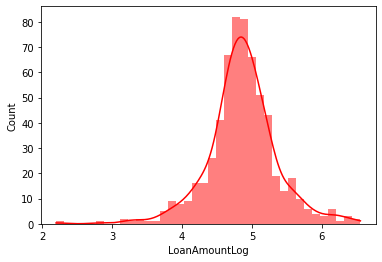

<Figure size 432x288 with 0 Axes>

In [271]:
# chuẩn hóa dữ liệu LoanAmount
loan_app_df['LoanAmountLog'] = np.log(loan_app_df['LoanAmount'])
sns.histplot(loan_app_df['LoanAmountLog'], color='red', kde=True, linewidth=0)
fig = plt.figure()

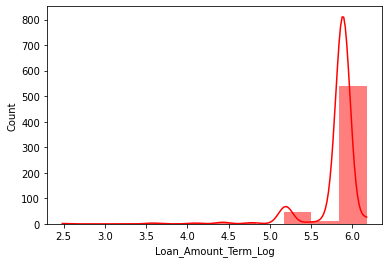

<Figure size 432x288 with 0 Axes>

In [272]:
# chuẩn hóa dữ liệu Loan_Amount_Term
loan_app_df['Loan_Amount_Term_Log'] = np.log(loan_app_df['Loan_Amount_Term'])
sns.histplot(loan_app_df['Loan_Amount_Term_Log'], color='red', kde=True, linewidth=0)
fig = plt.figure()

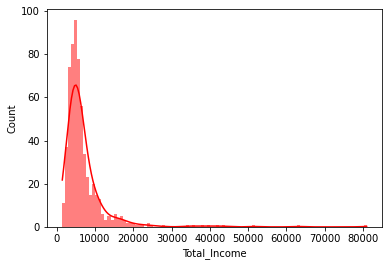

<Figure size 432x288 with 0 Axes>

In [273]:
# tạo ra cột tổng thu nhập
loan_app_df['Total_Income'] = loan_app_df['ApplicantIncome'] + loan_app_df['CoapplicantIncome']
sns.histplot(loan_app_df['Total_Income'], color='red', kde=True, linewidth=0)
fig = plt.figure()

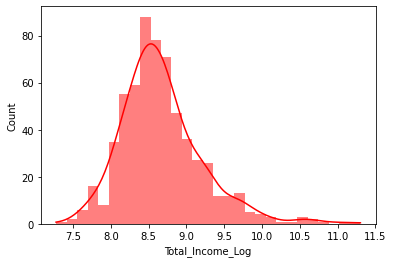

<Figure size 432x288 with 0 Axes>

In [274]:
# chuẩn hóa dữ liệu Total_Income
loan_app_df['Total_Income_Log'] = np.log(loan_app_df['Total_Income'])
sns.histplot(loan_app_df['Total_Income_Log'], color='red', kde=True, linewidth=0)
fig = plt.figure()

### Corelation Maxtric

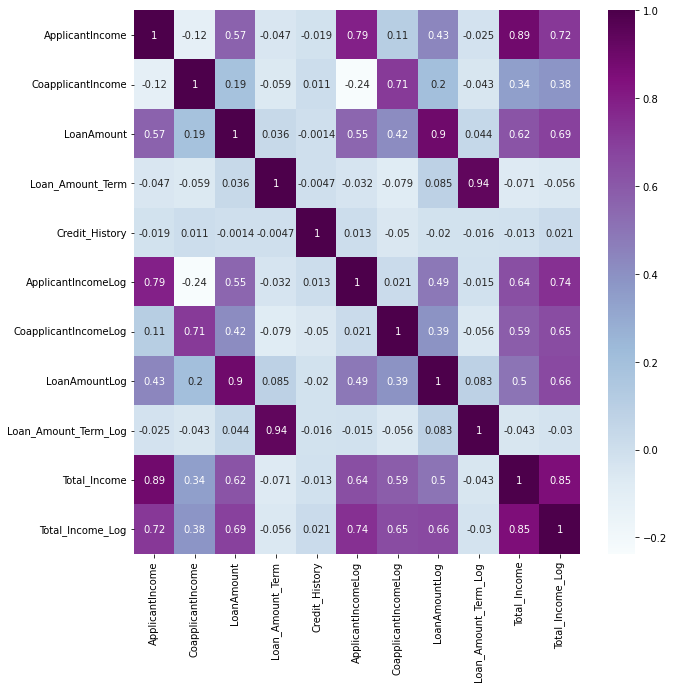

In [275]:
corr = loan_app_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap='BuPu')

Ta thấy rằng sự tương quan của các cột dữ liệu được chuẩn hóa và chưa chuẩn hóa rất cao rơi vào các mức 0.79 (ApplicantIncome), 0.71 (CoapplicantIncome), 0.9 (LoanAmount), ... vì thế để tránh sự thừa thải ta sẽ loại bỏ và không xét đến các cột dữ liệu chưa được chuẩn hóa.


In [276]:
loan_app_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,5.886104,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,5.886104,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104,6000.0,8.699515


Ta tiếp tục nhận thấy ở cột CoapplicantIncomeLog dữ liệu được chuẩn hóa gặp vấn đề ở giá trị vì thế ta tiến hành kiểm tra.

In [277]:
loan_app_df['CoapplicantIncomeLog'].value_counts()

-inf         273
 7.824046      5
 7.641564      5
 7.418181      5
 7.718685      3
            ... 
 7.934155      1
 6.917706      1
 7.435438      1
 7.862497      1
 5.480639      1
Name: CoapplicantIncomeLog, Length: 287, dtype: int64

Số dữ liệu bị lỗi ở CoapplicantIncomeLog nhìn chung rất là lớn, vì vậy để tránh sai sót trong quá trình phân tích và dự đoán, ta cũng loại bỏ cột CoapplicantIncomeLog

### Chuyển các kiểu object về dạng số

In [278]:
# định nghĩa hàm in các giá trị có trong các đối tượng object

obj_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area']

def print_col_values():
  for obj_col in obj_cols:
    print(obj_col,set(loan_app_df[obj_col].values.tolist()))

In [279]:
print_col_values()

Gender {'Male', 'Female'}
Dependents {'2', '1', '3+', '0'}
Married {'Yes', 'No'}
Education {'Graduate', 'Not Graduate'}
Self_Employed {'Yes', 'No'}
Loan_Status {'Y', 'N'}
Property_Area {'Semiurban', 'Rural', 'Urban'}


In [280]:
# chuyển về dạng số

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

for col in obj_cols:
  loan_app_df[col] = lab.fit_transform(loan_app_df[col])


In [281]:
print_col_values()

Gender {0, 1}
Dependents {0, 1, 2, 3}
Married {0, 1}
Education {0, 1}
Self_Employed {0, 1}
Loan_Status {0, 1}
Property_Area {0, 1, 2}


In [308]:
loan_app_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income,Total_Income_Log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,8.674026,-inf,4.986426,5.886104,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.430109,7.318540,4.852030,5.886104,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,8.006368,-inf,4.189655,5.886104,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,7.856707,7.765569,4.787492,5.886104,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,8.699515,-inf,4.948760,5.886104,6000.0,8.699515


### Tạo tập train và test

In [282]:
from sklearn.model_selection import train_test_split

Y = loan_app_df['Loan_Status']
X = loan_app_df.drop(['Loan_Status', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncomeLog', 'Total_Income'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

### Tạo tập huấn luyện

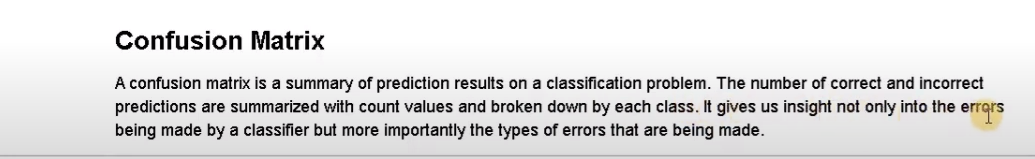

In [283]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def classify(model):
  model.fit(X_train, Y_train)
  print(model)
  print(f"Độ chính xác: {model.score(X_test, Y_test)*100}")
  print(f"Cross validation: {np.mean(cross_val_score(model, X, Y, cv=5))}")
  print("-"*50)
  # cột Y dữ liệu thực cột X dữ liệu dự đoán nếu X dự đoán 0 thì Y thực của 0 là 28
  Y_pred = model.predict(X_test)
  cm = confusion_matrix(Y_test, Y_pred)
  sns.heatmap(cm, annot=True).set_title(model)
  plt.figure(figsize=(5,5))

LogisticRegression(max_iter=3000)
Độ chính xác: 78.86178861788618
Cross validation: 0.809462881514061
--------------------------------------------------
DecisionTreeClassifier(max_depth=4)
Độ chính xác: 75.60975609756098
Cross validation: 0.7980274556843929
--------------------------------------------------
RandomForestClassifier()
Độ chính xác: 76.42276422764228
Cross validation: 0.79156337465014
--------------------------------------------------
KNeighborsClassifier()
Độ chính xác: 72.35772357723577
Cross validation: 0.755684392909503
--------------------------------------------------
SVC()
Độ chính xác: 65.04065040650406
Cross validation: 0.7230707716913234
--------------------------------------------------


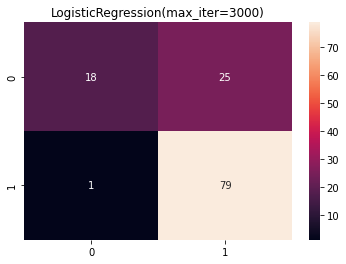

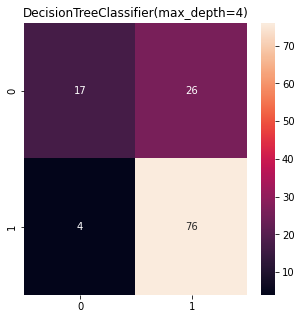

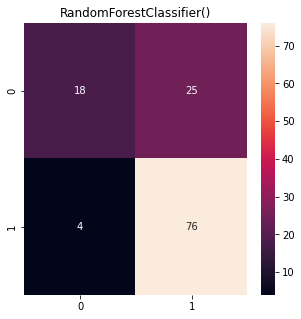

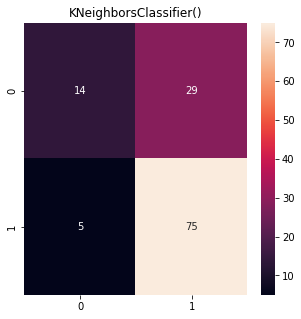

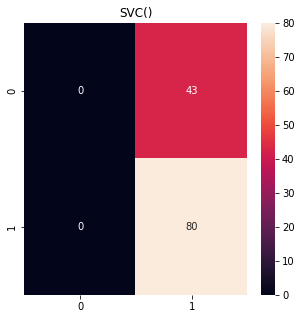

<Figure size 360x360 with 0 Axes>

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [
    LogisticRegression(max_iter=3000),
    DecisionTreeClassifier(max_depth=4),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
]


for model in models:
  classify(model) 

### Thực nghiệm bằng tập dữ liệu chưa dán nhãn

In [285]:
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [286]:
test_df.shape

(367, 12)

In [287]:
# đếm các số lượng các dữ liệu bị thiếu theo từng cột
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [288]:
# lắp giá trị xuất hiện nhiều nhất vào các giá trị null
test_df['Gender'].fillna(test_df['Gender'].dropna().mode().values[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].dropna().mode().values[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].dropna().mode().values[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].dropna().mode().values[0], inplace=True)

test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].dropna().mode().values[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].dropna().mode().values[0], inplace=True)


# lắp giá trị trung bình của toàn tập dữ liệu
test_df['LoanAmount'].fillna(test_df['LoanAmount'].dropna().mean(), inplace=True)

In [289]:
# đếm các số lượng các dữ liệu bị thiếu theo từng cột
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [290]:
test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

test_df['ApplicantIncomeLog'] = np.log(test_df['ApplicantIncome'])
test_df['CoapplicantIncomeLog'] = np.log(test_df['CoapplicantIncome'])
test_df['LoanAmountLog'] = np.log(test_df['LoanAmount'])
test_df['Loan_Amount_Term_Log'] = np.log(test_df['Loan_Amount_Term'])
test_df['Total_Income_Log'] = np.log(test_df['Total_Income'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [292]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,-inf,4.700480,5.886104,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.031385,7.313220,4.836282,5.886104,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.517193,7.495542,5.337538,5.886104,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,7.757906,7.842279,4.605170,5.886104,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,-inf,4.356709,5.886104,8.094378


In [294]:
for obj_col in obj_cols:
  if (obj_col != 'Loan_Status'):
    print(obj_col,set(test_df[obj_col].values.tolist()))

Gender {'Male', 'Female'}
Dependents {'2', '1', '3+', '0'}
Married {'Yes', 'No'}
Education {'Graduate', 'Not Graduate'}
Self_Employed {'Yes', 'No'}
Property_Area {'Semiurban', 'Rural', 'Urban'}


In [295]:
# chuyển về dạng số
lab_test = LabelEncoder()

for col in obj_cols:
  if (col != 'Loan_Status'):
    test_df[col] = lab_test.fit_transform(test_df[col])

In [296]:
  for obj_col in obj_cols:
    if (obj_col != 'Loan_Status'):
      print(obj_col,set(test_df[obj_col].values.tolist()))

Gender {0, 1}
Dependents {0, 1, 2, 3}
Married {0, 1}
Education {0, 1}
Self_Employed {0, 1}
Property_Area {0, 1, 2}


In [297]:
X_test_from_test_df = test_df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncomeLog', 'Total_Income'], axis = 1)
X_test_from_test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_from_test_df['ApplicantIncomeLog'].fillna(X_test_from_test_df['ApplicantIncomeLog'].dropna().mean(), inplace=True)

Ta nhận thấy sau khi train tập dữ liệu trước đó, đối với thuật toán LogisticRegression, DecisionTreeClassifier và RandomForestClassifier có độ chính xác khá cao (trên 75%) vì vậy ta sẽ dùng hai thuật toán này để thực nghiệm với tập dữ liệu chưa dán nhãn.

In [298]:
log_re = LogisticRegression(max_iter=3000, random_state=42)
log_re.fit(X_train, Y_train)
Y_pred_test_with_log_re = log_re.predict(X_test_from_test_df)

In [299]:
test_final_with_log_re_df = pd.DataFrame(test_df['Loan_ID'])

In [300]:
test_final_with_log_re_df['Loan_Status'] = pd.DataFrame(data=Y_pred_test_with_log_re, columns=["Loan_Status"])['Loan_Status'].map({0:'N', 1:'Y'})
test_final_with_log_re_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [301]:
test_final_with_log_re_df['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

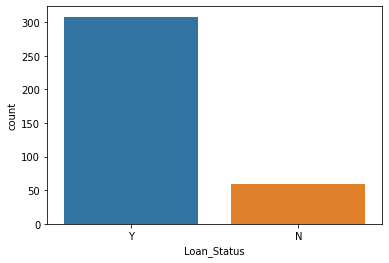

In [302]:
# kết quả thực nghiệm
sns.countplot(x='Loan_Status', data=test_final_with_log_re_df)

Sau khi thực nghiệm bằng LogisticRegression ta thấy số lượng được chấp nhận cho vay là 308 và không được vay là 59

In [303]:
ran_for = RandomForestClassifier()
ran_for.fit(X_train, Y_train)
Y_pred_test_with_ran_for = ran_for.predict(X_test_from_test_df)

In [304]:
test_final_with_ran_for_df = pd.DataFrame(test_df['Loan_ID'])

In [305]:
test_final_with_ran_for_df['Loan_Status'] = pd.DataFrame(data=Y_pred_test_with_ran_for, columns=["Loan_Status"])['Loan_Status'].map({0:'N', 1:'Y'})
test_final_with_ran_for_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [306]:
test_final_with_ran_for_df['Loan_Status'].value_counts()

Y    299
N     68
Name: Loan_Status, dtype: int64

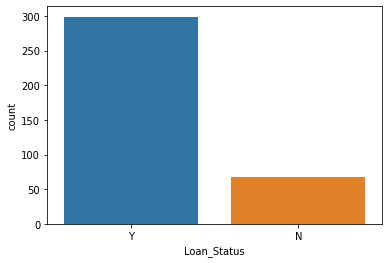

In [307]:
# kết quả thực nghiệm
sns.countplot(x='Loan_Status', data=test_final_with_ran_for_df)

Sau khi thực nghiệm bằng RandomForestClassifier ta thấy số lượng được chấp nhận cho vay là 299 và không được vay là 68

In [309]:
dec_tr = DecisionTreeClassifier(max_depth=4)
dec_tr.fit(X_train, Y_train)
Y_pred_test_with_dec_tr = dec_tr.predict(X_test_from_test_df)

In [310]:
test_final_with_dec_tr_df = pd.DataFrame(test_df['Loan_ID'])

In [311]:
test_final_with_dec_tr_df['Loan_Status'] = pd.DataFrame(data=Y_pred_test_with_dec_tr, columns=["Loan_Status"])['Loan_Status'].map({0:'N', 1:'Y'})
test_final_with_dec_tr_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [312]:
test_final_with_dec_tr_df['Loan_Status'].value_counts()

Y    302
N     65
Name: Loan_Status, dtype: int64

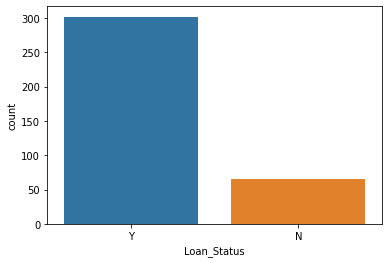

In [313]:
# kết quả thực nghiệm
sns.countplot(x='Loan_Status', data=test_final_with_dec_tr_df)

Sau khi thực nghiệm bằng DecisionTreeClassifier ta thấy số lượng được chấp nhận cho vay là 302 và không được vay là 65